In [37]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
m = ps.read_csv("movies.csv",encoding='latin1') 
r = ps.read_csv("ratings.csv")

In [38]:
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
r.drop(columns=['timestamp'],inplace=True)
r.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [41]:
m.drop(columns=['genres'],inplace=True)
m.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [42]:
m['year'] = m.title.str.extract('(\(\d\d\d\d\))',expand=False)
m['year'] = m.year.str.extract('(\d\d\d\d)',expand=False)
m.head()

,movieId,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995


In [43]:
m['title'] = m.title.str.replace('(\(\d\d\d\d\))', '')
m['title'] = m['title'].apply(lambda x: x.strip())
m.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [44]:
final_d = r.pivot(index='movieId',columns='userId',values='rating')
final_d.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
final_d.fillna(0,inplace=True)
final_d.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
no_user_voted = r.groupby('movieId')['rating'].agg('count')
no_movies_voted = r.groupby('userId')['rating'].agg('count')

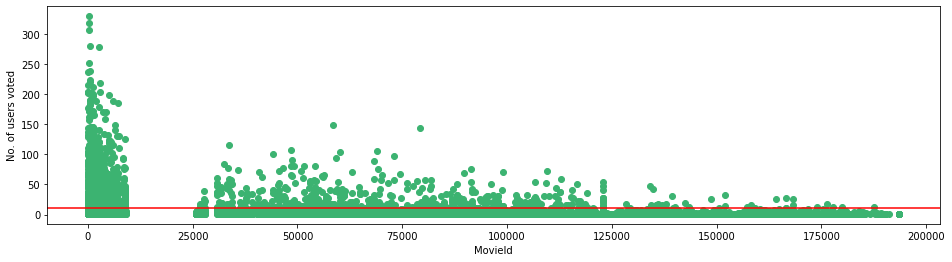

In [47]:
f,ax = p.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
p.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
p.axhline(y=10,color='r')
p.xlabel('MovieId')
p.ylabel('No. of users voted')
p.show()

In [48]:
final_d = final_d.loc[no_user_voted[no_user_voted > 10].index,:]

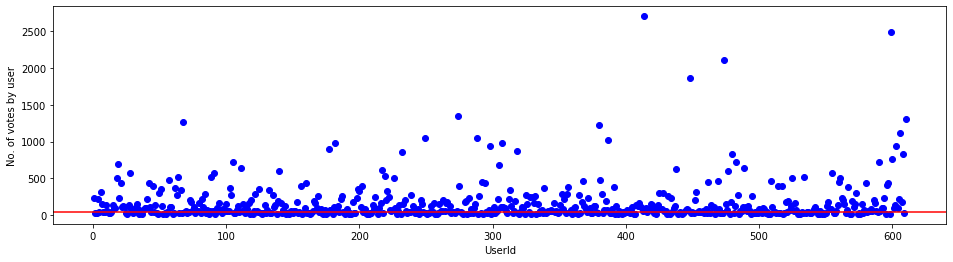

In [49]:
f,ax = p.subplots(1,1,figsize=(16,4))
p.scatter(no_movies_voted.index,no_movies_voted,color='blue')
p.axhline(y=50,color='r')
p.xlabel('UserId')
p.ylabel('No. of votes by user')
p.show()

In [50]:
final_d=final_d.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_d

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
csr_d = csr_matrix(final_d.values)
final_d.reset_index(inplace=True)
kn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
kn.fit(csr_d)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [52]:
def get_recommendation(movie_name):
    n_movies = 10
    movie_list = m[m['title'].str.contains(movie_name)]  
    
    if len(movie_list):        
        movie_id= movie_list.iloc[0]['movieId']
        movie_id = final_d[final_d['movieId'] == movie_id].index[0]
        distances , indices = kn.kneighbors(csr_d[movie_id],n_neighbors=n_movies+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_id = final_d.iloc[val[0]]['movieId']
            ind = m[m['movieId'] == movie_id].index
            recommend_frame.append({'Title':m.iloc[ind]['title'].values[0],'Distance':val[1]})
        df = ps.DataFrame(recommend_frame,index=range(1,n_movies+1))
        return df
    else:
        return " movies not found. Please check your input"

In [53]:
get_recommendation('Before Sunrise')

,Title,Distance
1,Three Colors: White (Trzy kolory: Bialy),0.594438
2,"Ice Storm, The",0.585959
3,"Wings of Desire (Himmel Ã¼ber Berlin, Der)",0.585069
4,State and Main,0.584900
5,Sexy Beast,0.579135
6,Big Night,0.572114
7,Malcolm X,0.569803
8,Crumb,0.552321
9,"Age of Innocence, The",0.546176
10,Before Sunset,0.477985


In [54]:
get_recommendation('Strange Days')

,Title,Distance
1,"Hudsucker Proxy, The",0.644190
2,JFK,0.644146
3,Hamlet,0.639997
4,Rumble in the Bronx (Hont faan kui),0.637173
5,Batman,0.629838
6,"English Patient, The",0.626153
7,Judge Dredd,0.620459
8,Casino,0.611757
9,Heat,0.589260
10,Carlito's Way,0.554757


In [55]:
get_recommendation('Baaghi')

' movies not found. Please check your input'